
<h2 style="text-align:center; background-color:#C7E9C0; color:black;padding:14px;"><b> Mini Project : Canada Musics Wrapped 2024 - Sentiment Analysis </b></h2>

---

<p style="text-align:right"><b> Project Creator: Flora Wong (Yuen Ling) </b></p>

### Project Goal :
This project aims at exploring sentiment in popular streamed music for 2024 in Canada using data from news articles and streaming platforms. 

### Notebook Content :
- [Part I - Canada Top-Ten Streamed Songs](#part-i)
- [Part II - Lyrics Extraction ](#part-ii)
- [Part III - Data Cleanning](#part-iii)
- [Part IV - Sentiment Analysis (NLP Models) & Visualization](#part-iv)
- [Part V - Keywords Count & Visualization ](#part-v)

<br></br>


<h2 style="text-align:center; background-color:#C7E9C0; color:black; padding:5px;"><b>  1. Canada Top-Ten Streamed Songs </b></h2><a id="part-i"></a>

In [3]:
Canada_most_streamed_songs ="""
1. "A Bar Song (Tipsy)" by Shaboozey
2. "Beautiful Things" by Benson Boone
3. "I Had Some Help (feat. Morgan Wallen)" by Morgan Wallen, Post Malone
4. "Espresso" by Sabrina Carpenter
5. "Stick Season" by Noah Kahan
6. "Lose Control" by Teddy Swims
7. "I Remember Everything (feat. Kacey Musgraves)" by Kacey Musgraves, Zach Bryan
8. "Too Sweet" by Hozier
9. "BIRDS OF A FEATHER" by Billie Eilish
10. "Not Like Us" by Kendrick Lamar"""

Reference: https://exclaim.ca/music/article/spotify-wrapped-2024-proves-that-canadians-have-questionable-taste

In [5]:
Canada_most_streamed_songs

'\n1. "A Bar Song (Tipsy)" by Shaboozey\n2. "Beautiful Things" by Benson Boone\n3. "I Had Some Help (feat. Morgan Wallen)" by Morgan Wallen, Post Malone\n4. "Espresso" by Sabrina Carpenter\n5. "Stick Season" by Noah Kahan\n6. "Lose Control" by Teddy Swims\n7. "I Remember Everything (feat. Kacey Musgraves)" by Kacey Musgraves, Zach Bryan\n8. "Too Sweet" by Hozier\n9. "BIRDS OF A FEATHER" by Billie Eilish\n10. "Not Like Us" by Kendrick Lamar'

In [6]:
import pandas as pd
import re
song = []
artist = []

pattern = r'\s*"(.*?)"\s*by\s*(.*)'
matches = re.findall(pattern, Canada_most_streamed_songs)

for match in matches:
    song.append(match[0])
    artist.append(match[1])

df = pd.DataFrame({
    "Song_Name": song,
    "Artist": artist})

print(df)

                                       Song_Name                       Artist
0                             A Bar Song (Tipsy)                    Shaboozey
1                               Beautiful Things                 Benson Boone
2          I Had Some Help (feat. Morgan Wallen)   Morgan Wallen, Post Malone
3                                       Espresso            Sabrina Carpenter
4                                   Stick Season                   Noah Kahan
5                                   Lose Control                  Teddy Swims
6  I Remember Everything (feat. Kacey Musgraves)  Kacey Musgraves, Zach Bryan
7                                      Too Sweet                       Hozier
8                             BIRDS OF A FEATHER                Billie Eilish
9                                    Not Like Us               Kendrick Lamar


<h2 style="text-align:center; background-color:#C7E9C0; color:black; padding:5px;"><b>  2. Extract Lyrics  </b></h2><a id="part-ii"></a>

### Access to Genius API

In [9]:
%run api_key.ipynb

In [10]:
client_access_token = my_client_access_token

### Access to API Wrapper - LyricsGenius

In [12]:
!pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /private/var/folders/qp/ljh_2xf51cg0lybz4xhz9sm00000gn/T/pip-req-build-7bp15l6w
  Running command git clone --filter=blob:none --quiet https://github.com/johnwmillr/LyricsGenius.git /private/var/folders/qp/ljh_2xf51cg0lybz4xhz9sm00000gn/T/pip-req-build-7bp15l6w
  Resolved https://github.com/johnwmillr/LyricsGenius.git to commit 795a81b0d0bd63855d18dc694400fb34079f6f6f
  Preparing metadata (setup.py) ... done


### Search Specific Lyrics By its Song Name and Artist Name

In [14]:
import lyricsgenius
LyricsGenius = lyricsgenius.Genius(client_access_token)

### Loop through all the Song Titles and Artist Names to Get Lyrics

In [16]:
lyrics_list = []

for index, row in df.iterrows():
    song_title = row['Song_Name']
    artist_name = row['Artist']

    song = LyricsGenius.search_song(song_title, artist_name)
    
    if song:  
        lyrics_list.append(song.lyrics)
    else:
        lyrics_list.append(None)

df['Lyrics'] = lyrics_list

Searching for "A Bar Song (Tipsy)" by Shaboozey...
Done.
Searching for "Beautiful Things" by Benson Boone...
Done.
Searching for "I Had Some Help (feat. Morgan Wallen)" by Morgan Wallen, Post Malone...
Done.
Searching for "Espresso" by Sabrina Carpenter...
Done.
Searching for "Stick Season" by Noah Kahan...
Done.
Searching for "Lose Control" by Teddy Swims...
Done.
Searching for "I Remember Everything (feat. Kacey Musgraves)" by Kacey Musgraves, Zach Bryan...
Done.
Searching for "Too Sweet" by Hozier...
Done.
Searching for "BIRDS OF A FEATHER" by Billie Eilish...
Done.
Searching for "Not Like Us" by Kendrick Lamar...
Done.


In [17]:
df['Lyrics']

0    [Verse 1]\nMy baby want a Birkin, she's been t...
1    [Verse 1]\nFor a while there, it was rough\nBu...
2    [Verse 1: Post Malone]\nYou got a lotta nerve,...
3    [Chorus]\nNow he's thinkin' 'bout me every nig...
4    [Verse 1]\nAs you promised me that I was more ...
5    [Verse 1]\nSomething's got a hold of me lately...
6    [Verse 1: Zach Bryan]\nRotgut whiskey's gonna ...
7    [Verse 1]\nIt can't be said I'm an early bird\...
8    [Intro]\n\n[Verse 1]\nI want you to stay\n'Til...
9    [Intro]\nPsst, I see dead people\n(Mustard on ...
Name: Lyrics, dtype: object

<h2 style="text-align:center; background-color:#C7E9C0; color:black; padding:5px;"><b>  3. Data Cleanning </b></h2><a id="part-iii"></a>

### Make Function to Clean the Lyrics

In [20]:
# Use regular expression to remove text inside square brackets (e.g. [ Verse 1], [Pre-Chorus], [Chorus]...)
import re
def clean_lyrics(lyrics):
    """
    Remove all text inside square brackets from the given lyrics.
    
    Parameters:
    lyrics (str): The lyrics text to clean.
    
    Returns:
    str: The cleaned lyrics without text in square brackets.
    """
    cleaned_lyrics = re.sub(r'\[.*?\]', '', lyrics)
    return cleaned_lyrics.strip()

### Create a Loop For Cleanning

In [22]:
cleaned_lyrics =[]

for lyrics in df['Lyrics']:
    cleaned = clean_lyrics(lyrics)
    cleaned_lyrics.append(cleaned)

df['Cleaned_Lyrics'] = cleaned_lyrics

In [23]:
df.head()

,Song_Name,Artist,Lyrics,Cleaned_Lyrics
0,A Bar Song (Tipsy),Shaboozey,"[Verse 1]\nMy baby want a Birkin, she's been t...","My baby want a Birkin, she's been tellin' me a..."
1,Beautiful Things,Benson Boone,"[Verse 1]\nFor a while there, it was rough\nBu...","For a while there, it was rough\nBut lately, I..."
2,I Had Some Help (feat. Morgan Wallen),"Morgan Wallen, Post Malone","[Verse 1: Post Malone]\nYou got a lotta nerve,...","You got a lotta nerve, don't you, baby?\nI onl..."
3,Espresso,Sabrina Carpenter,[Chorus]\nNow he's thinkin' 'bout me every nig...,"Now he's thinkin' 'bout me every night, oh\nIs..."
4,Stick Season,Noah Kahan,[Verse 1]\nAs you promised me that I was more ...,As you promised me that I was more than all th...


<h2 style="text-align:center; background-color:#C7E9C0; color:black; padding:5px;"><b>  4. Sentiment Analysis (NLP Models) & Visualization </b></h2><a id="part-iv"></a>

## 4.1. Getting Sentiment Scores + Labels (with a pre-trained model)

A Pre-trained LLM model from Hugging Face: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

### Load and Use the Model 

In [28]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
    
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

all_scores = []
highest_labels = []

for lyrics in df['Cleaned_Lyrics']:
    text = preprocess(lyrics[0:514])
    encoded_input = tokenizer(text, return_tensors='pt') 
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    all_scores.append(scores)
    
    ranking = np.argsort(scores)[::-1]
    highest_label = config.id2label[ranking[0]]
    highest_labels.append(highest_label)

scores_df = pd.DataFrame(all_scores, columns=['Negative_Score','Neutral_Score','Positive_Score'])
df = pd.concat([df.reset_index(drop=True), scores_df], axis=1)

df['Highest_Label'] = highest_labels

print(df)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                       Song_Name                       Artist  \
0                             A Bar Song (Tipsy)                    Shaboozey   
1                               Beautiful Things                 Benson Boone   
2          I Had Some Help (feat. Morgan Wallen)   Morgan Wallen, Post Malone   
3                                       Espresso            Sabrina Carpenter   
4                                   Stick Season                   Noah Kahan   
5                                   Lose Control                  Teddy Swims   
6  I Remember Everything (feat. Kacey Musgraves)  Kacey Musgraves, Zach Bryan   
7                                      Too Sweet                       Hozier   
8                             BIRDS OF A FEATHER                Billie Eilish   
9                                    Not Like Us               Kendrick Lamar   

                                              Lyrics  \
0  [Verse 1]\nMy baby want a Birkin, she's been t...

In [29]:
df

,Song_Name,Artist,Lyrics,Cleaned_Lyrics,Negative_Score,Neutral_Score,Positive_Score,Highest_Label
0,A Bar Song (Tipsy),Shaboozey,"[Verse 1]\nMy baby want a Birkin, she's been t...","My baby want a Birkin, she's been tellin' me a...",0.415210,0.437350,0.147440,neutral
1,Beautiful Things,Benson Boone,"[Verse 1]\nFor a while there, it was rough\nBu...","For a while there, it was rough\nBut lately, I...",0.046860,0.222190,0.730950,positive
2,I Had Some Help (feat. Morgan Wallen),"Morgan Wallen, Post Malone","[Verse 1: Post Malone]\nYou got a lotta nerve,...","You got a lotta nerve, don't you, baby?\nI onl...",0.602829,0.346774,0.050397,negative
3,Espresso,Sabrina Carpenter,[Chorus]\nNow he's thinkin' 'bout me every nig...,"Now he's thinkin' 'bout me every night, oh\nIs...",0.183461,0.558742,0.257797,neutral
4,Stick Season,Noah Kahan,[Verse 1]\nAs you promised me that I was more ...,As you promised me that I was more than all th...,0.553021,0.395124,0.051855,negative
5,Lose Control,Teddy Swims,[Verse 1]\nSomething's got a hold of me lately...,"Something's got a hold of me lately\nNo, I don...",0.752331,0.223318,0.024351,negative
6,I Remember Everything (feat. Kacey Musgraves),"Kacey Musgraves, Zach Bryan",[Verse 1: Zach Bryan]\nRotgut whiskey's gonna ...,Rotgut whiskey's gonna ease my mind\nBeach tow...,0.111303,0.593739,0.294958,neutral
7,Too Sweet,Hozier,[Verse 1]\nIt can't be said I'm an early bird\...,It can't be said I'm an early bird\nIt's 10 o'...,0.146232,0.613243,0.240526,neutral
8,BIRDS OF A FEATHER,Billie Eilish,[Intro]\n\n[Verse 1]\nI want you to stay\n'Til...,I want you to stay\n'Til I'm in the grave\n'Ti...,0.145698,0.565877,0.288425,neutral
9,Not Like Us,Kendrick Lamar,"[Intro]\nPsst, I see dead people\n(Mustard on ...","Psst, I see dead people\n(Mustard on the beat,...",0.469575,0.469572,0.060853,negative


## 4.2. Getting Complex Emotion Classification ( with a pretrained model)

A Pre-trained LLM model from Hugging Face: https://huggingface.co/SamLowe/roberta-base-go_emotions

### Load the Model

In [33]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")


In [34]:
id2label = model.config.id2label
id2label 

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

### Make Function for Extracting Sentiment Label

In [36]:
def sentiment_label(t):
    tokens = tokenizer.encode(t, return_tensors='pt', max_length=512, truncation=True)    # set Max.token, cut off exceeding text
    result = model(tokens)
    probabilities = torch.sigmoid(result.logits)
    top_probabilities, top_indices = torch.topk(probabilities, 3)
    top_probabilities = top_probabilities.squeeze().tolist()
    top_indices = top_indices.squeeze().tolist()
    top_labels = [id2label[index] for index in top_indices]
    return top_probabilities, top_indices, top_labels

### Create a Loop for Extracting the Top Three Emotions

In [38]:
top_three_list=[]
first_emotion=[]
second_emotion=[]
third_emotion=[]

for lyrics in df['Cleaned_Lyrics']:
    top3_sentiment= sentiment_label(lyrics)[2] 
    top_three_list.append(top3_sentiment)
    first_emotion.append(top3_sentiment[0])
    second_emotion.append(top3_sentiment[1])
    third_emotion.append(top3_sentiment[2])

df['Top_Three_Emotion']= top_three_list
df['First_Emotion']=first_emotion
df['Second_Emotion']=second_emotion
df['Third_Emotion']=third_emotion

In [39]:
df

,Song_Name,Artist,Lyrics,Cleaned_Lyrics,Negative_Score,Neutral_Score,Positive_Score,Highest_Label,Top_Three_Emotion,First_Emotion,Second_Emotion,Third_Emotion
0,A Bar Song (Tipsy),Shaboozey,"[Verse 1]\nMy baby want a Birkin, she's been t...","My baby want a Birkin, she's been tellin' me a...",0.415210,0.437350,0.147440,neutral,"[annoyance, neutral, disappointment]",annoyance,neutral,disappointment
1,Beautiful Things,Benson Boone,"[Verse 1]\nFor a while there, it was rough\nBu...","For a while there, it was rough\nBut lately, I...",0.046860,0.222190,0.730950,positive,"[love, desire, optimism]",love,desire,optimism
2,I Had Some Help (feat. Morgan Wallen),"Morgan Wallen, Post Malone","[Verse 1: Post Malone]\nYou got a lotta nerve,...","You got a lotta nerve, don't you, baby?\nI onl...",0.602829,0.346774,0.050397,negative,"[neutral, annoyance, anger]",neutral,annoyance,anger
3,Espresso,Sabrina Carpenter,[Chorus]\nNow he's thinkin' 'bout me every nig...,"Now he's thinkin' 'bout me every night, oh\nIs...",0.183461,0.558742,0.257797,neutral,"[neutral, disappointment, curiosity]",neutral,disappointment,curiosity
4,Stick Season,Noah Kahan,[Verse 1]\nAs you promised me that I was more ...,As you promised me that I was more than all th...,0.553021,0.395124,0.051855,negative,"[love, fear, realization]",love,fear,realization
5,Lose Control,Teddy Swims,[Verse 1]\nSomething's got a hold of me lately...,"Something's got a hold of me lately\nNo, I don...",0.752331,0.223318,0.024351,negative,"[disappointment, annoyance, sadness]",disappointment,annoyance,sadness
6,I Remember Everything (feat. Kacey Musgraves),"Kacey Musgraves, Zach Bryan",[Verse 1: Zach Bryan]\nRotgut whiskey's gonna ...,Rotgut whiskey's gonna ease my mind\nBeach tow...,0.111303,0.593739,0.294958,neutral,"[neutral, curiosity, annoyance]",neutral,curiosity,annoyance
7,Too Sweet,Hozier,[Verse 1]\nIt can't be said I'm an early bird\...,It can't be said I'm an early bird\nIt's 10 o'...,0.146232,0.613243,0.240526,neutral,"[admiration, approval, curiosity]",admiration,approval,curiosity
8,BIRDS OF A FEATHER,Billie Eilish,[Intro]\n\n[Verse 1]\nI want you to stay\n'Til...,I want you to stay\n'Til I'm in the grave\n'Ti...,0.145698,0.565877,0.288425,neutral,"[love, desire, confusion]",love,desire,confusion
9,Not Like Us,Kendrick Lamar,"[Intro]\nPsst, I see dead people\n(Mustard on ...","Psst, I see dead people\n(Mustard on the beat,...",0.469575,0.469572,0.060853,negative,"[neutral, annoyance, anger]",neutral,annoyance,anger


## Visualiza Top Three Emotions

### Count of First Emotion

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


<Axes: xlabel='count', ylabel='First_Emotion'>

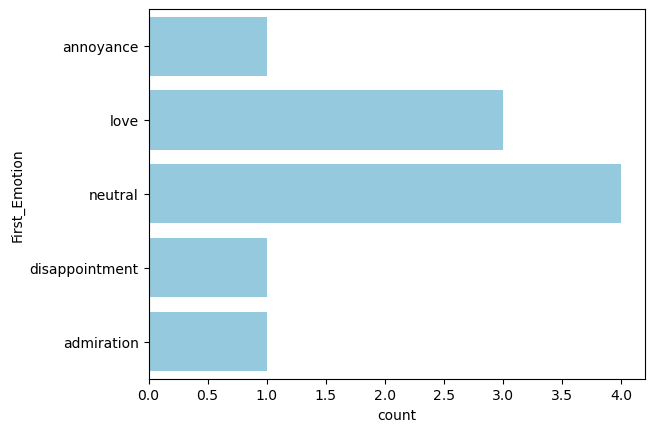

In [42]:
import seaborn as sns
import pandas as pd

sns.countplot(df['First_Emotion'], color='skyblue')

### Count of Second Emotion

<Axes: xlabel='count', ylabel='Second_Emotion'>

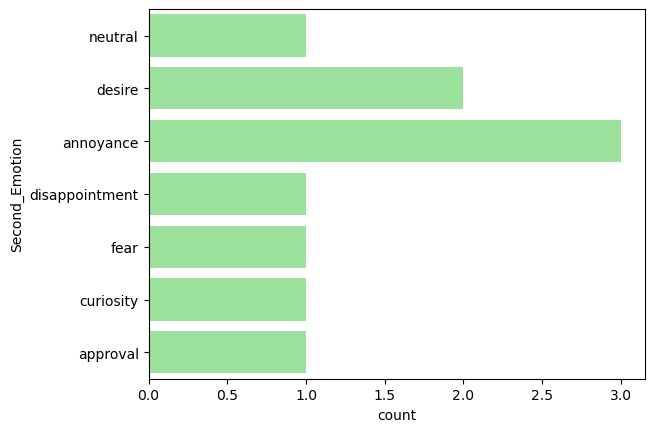

In [44]:
sns.countplot(df['Second_Emotion'], color='lightgreen')

### Count of Third Emotion

<Axes: xlabel='count', ylabel='Third_Emotion'>

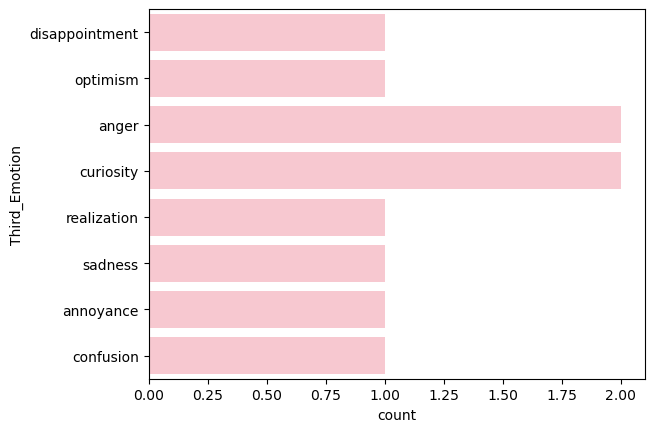

In [46]:
sns.countplot(df['Third_Emotion'], color='pink')

## Visualize the Proportion of Popular Emotions 

In [48]:
total_emo =[]

for list in df['Top_Three_Emotion']:
    for emo in list:
        total_emo.append(emo)
        
total_emo_pd = pd.DataFrame(total_emo)

In [49]:
proportion_total_emo = total_emo_pd.value_counts(normalize=True)
proportion_total_emo_pd = pd.DataFrame(proportion_total_emo)
proportion_total_emo_pd

,proportion
0,
annoyance,0.166667
neutral,0.166667
curiosity,0.100000
disappointment,0.100000
love,0.100000
anger,0.066667
desire,0.066667
admiration,0.033333
approval,0.033333


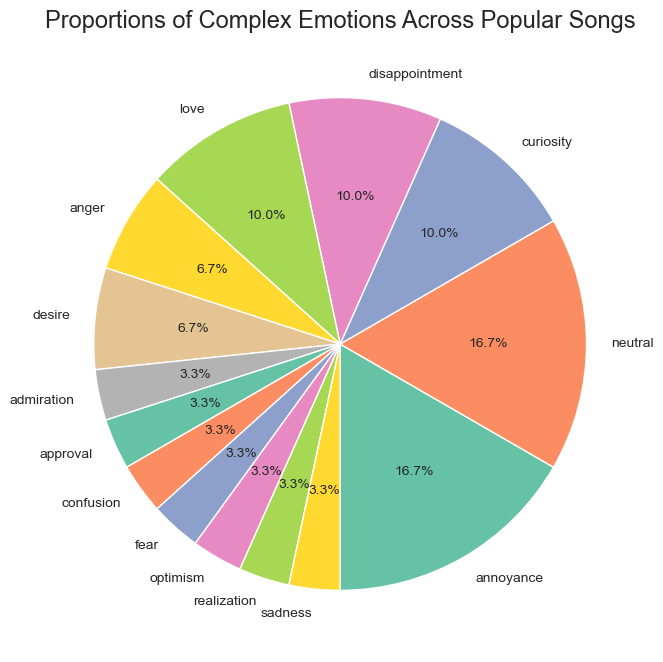

In [50]:
import matplotlib.pyplot as plt

labels_post = proportion_total_emo_pd.index.get_level_values(0).astype(str)

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
colors = sns.color_palette("Set2", len(proportion_total_emo_pd))
plt.pie(proportion_total_emo_pd['proportion'],labels=labels_post, autopct='%1.1f%%',startangle=270,colors=colors)
plt.title('Proportions of Complex Emotions Across Popular Songs',fontsize=17)
plt.show()

<br>
</br>

<h2 style="text-align:center; background-color:#C7E9C0; color:black; padding:5px;"><b>  5. Frequent Words in the Popular Songs</b></h2><a id="part-v"></a>

## Use Stopwords + Make Function for getting Frequent Words

In [54]:
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines()) 

In [55]:
from collections import Counter
import re

In [56]:
def split_into_words(chunk_of_text):
    lowercase_text = chunk_of_text.lower()
    split_words = re.split(r"\W+", lowercase_text)  # Use raw string for the regex
    return split_words

In [57]:
def get_most_frequent_words(lyrics):
    
    number_of_desired_words = 20
    meaningful_words_tally = Counter()
    all_words = split_into_words(lyrics)
    meaningful_words = [word for word in all_words if word not in stopwords]
    meaningful_words_tally.update(meaningful_words)
    
    most_frequent_meaningful_words = meaningful_words_tally.most_common(number_of_desired_words)

    return most_frequent_meaningful_words

## Visualize the Word Counts for The Top 10 Canada Songs 2024

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

def word_frequency_plot(df):
    for i in range(0, 10):
        frequencies = get_most_frequent_words(df['Cleaned_Lyrics'][i])
        word_frequency_df = pd.DataFrame(frequencies, columns=['word', 'word_count'])
        print(f"Word frequencies for song '{df['Song_Name'][i]}': {frequencies}")
        
        word_frequency_df.sort_values(by='word_count').plot(
            x='word', 
            kind='barh', 
            title=df['Song_Name'][i], 
            legend=False)
        plt.show()


Word frequencies for song 'A Bar Song (Tipsy)': [('bar', 13), ('gettin', 13), ('tipsy', 12), ('double', 7), ('shot', 7), ('whiskey', 7), ('lord', 5), ('jack', 5), ('pour', 4), ('history', 4), ('bring', 3), ('good', 3), ('party', 3), ('downtown', 3), ('5th', 3), ('street', 3), ('daniel', 3), ('baby', 2), ('round', 2), ('plenty', 2)]


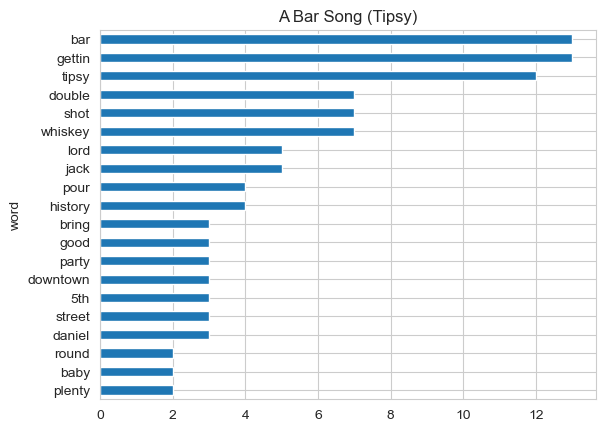

Word frequencies for song 'Beautiful Things': [('stay', 5), ('god', 5), ('things', 5), ('beautiful', 4), ('night', 3), ('girl', 2), ('love', 2), ('man', 2), ('lose', 2), ('ooh', 2), ('rough', 1), ('doin', 1), ('cold', 1), ('decembers', 1), ('recall', 1), ('family', 1), ('month', 1), ('parents', 1), ('day', 1), ('hold', 1)]


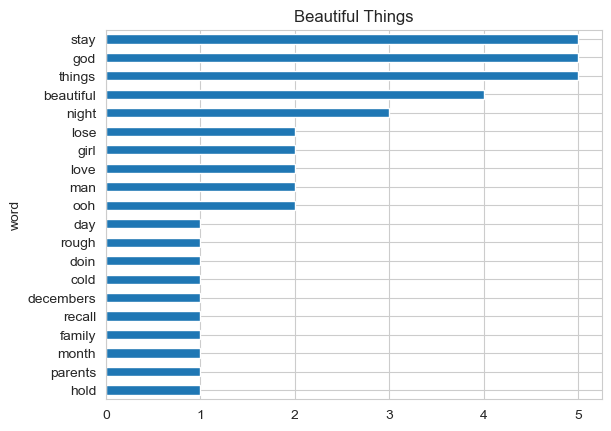

Word frequencies for song 'I Had Some Help (feat. Morgan Wallen)': [('baby', 3), ('kinda', 3), ('mess', 3), ('pull', 3), ('bottle', 3), ('shelf', 3), ('deep', 3), ('weekend', 3), ('teamwork', 3), ('dream', 3), ('work', 3), ('hell', 3), ('blame', 3), ('thought', 2), ('lotta', 1), ('nerve', 1), ('hit', 1), ('curb', 1), ('tellin', 1), ('friends', 1)]


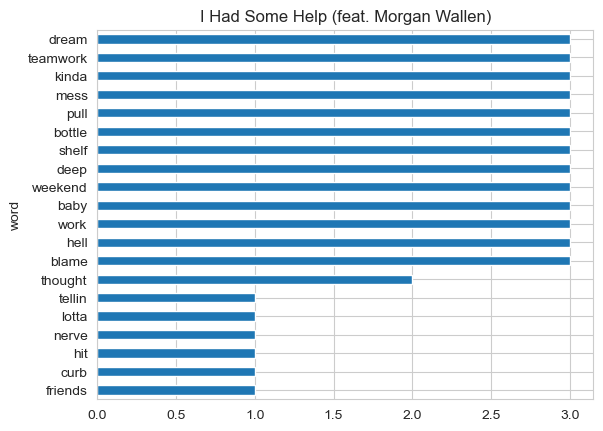

Word frequencies for song 'Espresso': [('ya', 12), ('espresso', 9), ('sleep', 8), ('baby', 8), ('mm', 8), ('sweet', 6), ('guess', 6), ('left', 5), ('thinkin', 4), ('bout', 4), ('night', 4), ('switch', 4), ('nintendo', 4), ('bad', 2), ('walked', 2), ('dream', 2), ('trued', 2), ('soft', 2), ('skin', 2), ('perfumed', 2)]


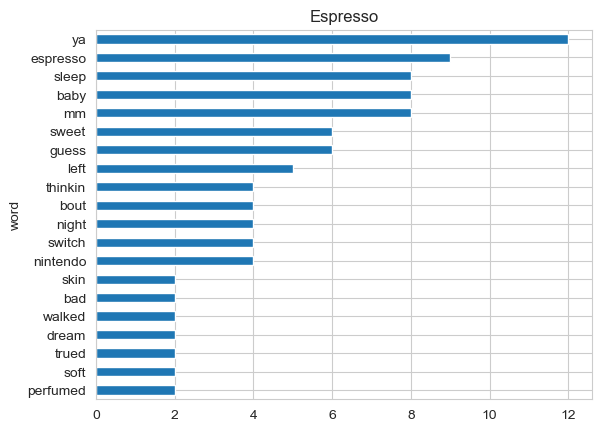

Word frequencies for song 'Stick Season': [('half', 7), ('love', 3), ('vermont', 3), ('season', 3), ('sticks', 3), ('mom', 3), ('forgot', 3), ('existed', 3), ('fault', 3), ('play', 3), ('victim', 3), ('drink', 3), ('alcohol', 3), ('friends', 3), ('christmas', 3), ('dream', 3), ('night', 3), ('version', 3), ('lose', 3), ('tire', 3)]


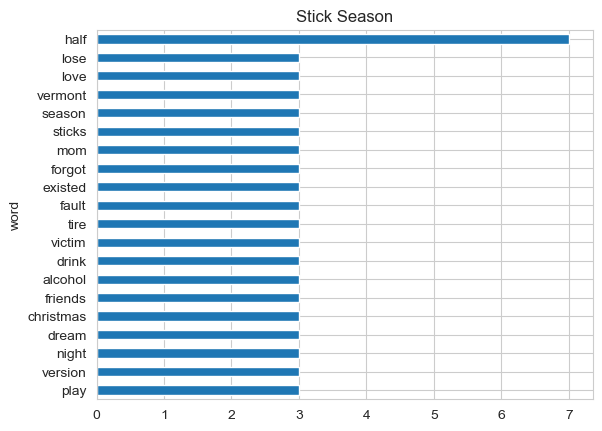

Word frequencies for song 'Lose Control': [('yeah', 6), ('lose', 6), ('control', 6), ('fallin', 3), ('breakin', 3), ('heart', 3), ('baby', 3), ('mess', 3), ('skin', 2), ('mhm', 2), ('problematic', 2), ('problem', 2), ('bad', 2), ('mm', 2), ('hold', 1), ('feels', 1), ('walls', 1), ('closin', 1), ('devil', 1), ('knockin', 1)]


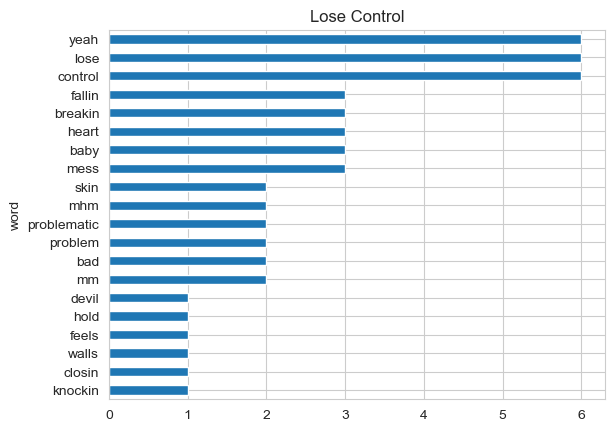

Word frequencies for song 'I Remember Everything (feat. Kacey Musgraves)': [('remember', 7), ('mind', 6), ('time', 6), ('ease', 4), ('grown', 4), ('man', 4), ('drinkin', 4), ('gonna', 3), ('beach', 3), ('88', 3), ('ford', 3), ('cold', 3), ('shoulder', 3), ('closing', 3), ('stay', 3), ('sun', 3), ('rose', 3), ('mouth', 3), ('broke', 3), ('pictures', 3)]


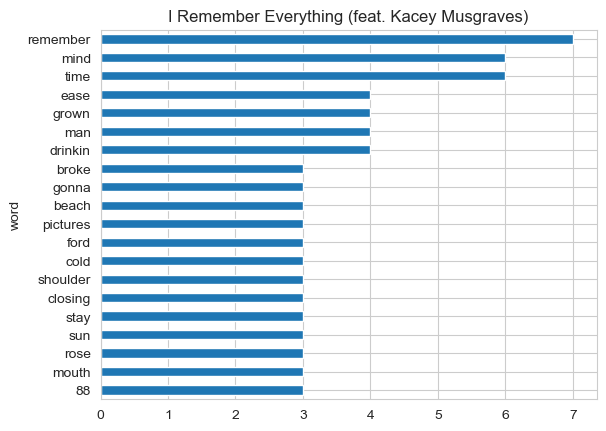

Word frequencies for song 'Too Sweet': [('sweet', 11), ('woah', 8), ('bed', 6), ('neat', 5), ('coffee', 5), ('black', 5), ('3', 5), ('whiskey', 4), ('ooh', 4), ('babe', 3), ('baby', 2), ('live', 2), ('wake', 2), ('aim', 2), ('early', 1), ('bird', 1), ('10', 1), ('clock', 1), ('word', 1), ('sleep', 1)]


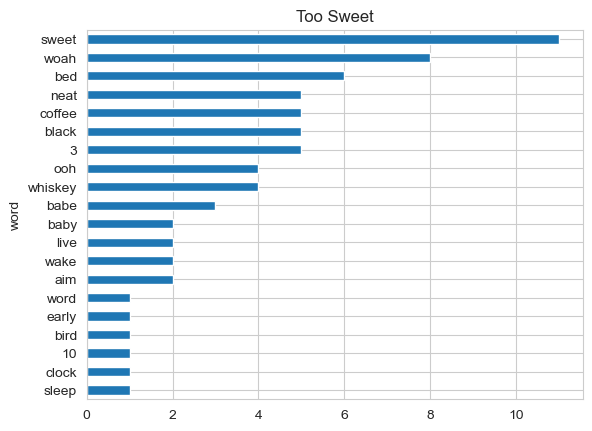

Word frequencies for song 'BIRDS OF A FEATHER': [('day', 5), ('die', 5), ('forever', 4), ('love', 4), ('baby', 3), ('eyes', 3), ('uh', 2), ('birds', 2), ('feather', 2), ('stick', 2), ('change', 2), ('weather', 2), ('cryin', 2), ('long', 2), ('light', 2), ('leaves', 2), ('hm', 2), ('ya', 2), ('wanna', 2), ('stay', 1)]


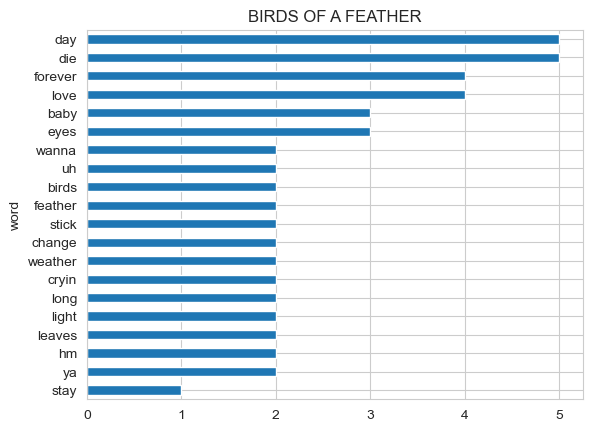

Word frequencies for song 'Not Like Us': [('hey', 17), ('ayy', 12), ('nigga', 11), ('wop', 10), ('ass', 9), ('step', 8), ('god', 7), ('niggas', 6), ('bitch', 5), ('69', 5), ('freaky', 5), ('fan', 5), ('fuck', 4), ('mm', 4), ('life', 4), ('ov', 4), ('beat', 3), ('certified', 3), ('boy', 3), ('atlanta', 3)]


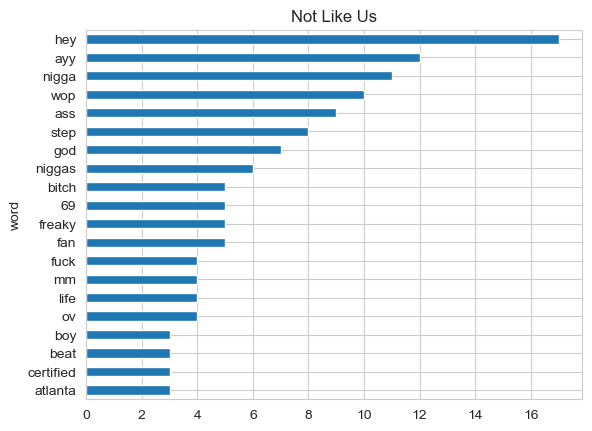

In [203]:
word_frequency_plot(df)

<br>
</br>